# Home Credit Risk Analysis for Machine learning project IF 441 - B

Description : This notebook is used for predicting Home credit risk in Indonesia. The dataset can be accessed by using this <a href = https://www.kaggle.com/datasets/dwiwahyuef/home-credit-indonesia-default-risk>Link</a>. The main reason why we use this dataset because we could not find any trusted journal from scimagjor that discuss about this topic. Therefore, we could use this opportunity to further analyze what is going on.

Note : Before we start to perform data manipulation to create models. we also research some journal that is very similar to credit risk analysis but not as specific as this topic. We read those journals to find some **references** and potential **research gap** for us to implement in this journal. You can access the file we used to read all the journals <a href = "https://docs.google.com/spreadsheets/d/1UUFPzZtpT_SAIC7mc16DE4hJyCBK8i_aWLWxOL_yRX4/edit?usp=sharing
">here.</a>.


## Group members

1. Calvin Leo
2. Descelia
3. Muiz
4. Howard
5. Theo

## Credits

We would also like to express our gratitude for our machine learning lecturer Dr.DAVID AGUSTRIAWAN, S.KOM., M.SC., PH.D. Hence, He guided us most of the necessary steps to perform the best accuracy for this model.

# Data pre-processing Step

## Importing the data

In [49]:
import kagglehub
path = kagglehub.dataset_download("dwiwahyuef/home-credit-indonesia-default-risk")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\dwiwahyuef\home-credit-indonesia-default-risk\versions\1


In [50]:
!dir "C:/Users/USER/.cache/kagglehub/datasets/dwiwahyuef/home-credit-indonesia-default-risk/versions/1"

 Volume in drive C is Windows
 Volume Serial Number is AE85-C342

 Directory of C:\Users\USER\.cache\kagglehub\datasets\dwiwahyuef\home-credit-indonesia-default-risk\versions\1

10/07/2025  07:30 PM    <DIR>          .
10/07/2025  07:30 PM    <DIR>          ..
10/07/2025  07:30 PM        26,567,651 application_test.csv
10/07/2025  07:30 PM       166,133,370 application_train.csv
10/07/2025  07:30 PM       170,016,717 bureau.csv
10/07/2025  07:30 PM       375,592,889 bureau_balance.csv
10/07/2025  07:30 PM       424,582,605 credit_card_balance.csv
10/07/2025  07:30 PM            37,383 HomeCredit_columns_description.csv
10/07/2025  07:30 PM       723,118,349 installments_payments.csv
10/07/2025  07:30 PM       392,703,158 POS_CASH_balance.csv
10/07/2025  07:30 PM       404,973,293 previous_application.csv
10/07/2025  07:30 PM           536,202 sample_submission.csv
              10 File(s)  2,684,261,617 bytes
               2 Dir(s)  167,954,644,992 bytes free


In [51]:
import pandas as pd
import numpy as np

## Checking train.csv and test.csv

In [ ]:
df_train = pd.read_csv("C:/Users/USER/.cache/kagglehub/datasets/dwiwahyuef/home-credit-indonesia-default-risk/versions/1/application_train.csv")
df_test = pd.read_csv("C:/Users/USER/.cache/kagglehub/datasets/dwiwahyuef/home-credit-indonesia-default-risk/versions/1/application_test.csv")
df_bureau = pd.read_csv("C:/Users/USER/.cache/kagglehub/datasets/dwiwahyuef/home-credit-indonesia-default-risk/versions/1/application_test.csv")

In [5]:
print(f"df train has \t: {len(df_train)} rows")
print(f"df test has \t: {len(df_test)} rows")

df train has 	: 307511 rows
df test has 	: 48744 rows


## Displaying all features from train.csv

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(f"df train has \t: {len(df_train.columns)} features")
df_train.head()

df train has 	: 122 features


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Displaying all features from test.csv

In [7]:
print(f"df train has \t: {len(df_test.columns)} features")
df_test.head()

df train has 	: 121 features


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

## Differentiating dependent variable and features from dataset

In [8]:
df = df_train
X = df.drop("TARGET", axis = 1)
y = df["TARGET"]

In [9]:
value_counts = y.value_counts(dropna=False)
print("All uniques values from dependent variable: \n")
print(value_counts)

All uniques values from dependent variable: 

TARGET
0    282686
1     24825
Name: count, dtype: int64


## SPLIT `df` FIRST

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Categorize all features

In [11]:
from pandas.api.types import is_numeric_dtype, is_bool_dtype, is_string_dtype, is_categorical_dtype

def is_numeric_boolean(feature):
  unique_value = feature.dropna().unique()
  return set(unique_value).issubset({0, 1})


def categorize_features(df, id_threshold= 0.95, cat_unique_thres=0.05):
  n = len(df)
  result = {
      "numeric" : [],
      "boolean" : [],
      "categorical": [],
      "identifier": []
  }
  for col in df.columns:
    feature = df[col]
    dtype = feature.dtype

    if is_bool_dtype(feature) or is_numeric_boolean(feature):
      result["boolean"].append(col)

    elif is_numeric_dtype(feature):
      num_unique = feature.nunique(dropna=True)
      if num_unique / n > id_threshold:
        result["identifier"].append(col)
      else:
        result["numeric"].append(col)

    elif is_categorical_dtype(feature) or is_string_dtype(feature):
      num_unique = feature.nunique(dropna=True)
      if num_unique / n > id_threshold:
        result["identifier"].append(col)
      elif num_unique / n < cat_unique_thres:
        result["categorical"].append(col)
      else:
        result["categorical"].append(col)
  return result



In [12]:
dictionary = categorize_features(X_train)
for key, cols in dictionary.items():
    print(f"\n{key.upper()} ({len(cols)} features):")
    for col in cols:
        print(f"  - {col}")

C:\Users\USER\AppData\Local\Temp\ipykernel_14492\419288188.py:30: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif is_categorical_dtype(feature) or is_string_dtype(feature):



NUMERIC (72 features):
  - CNT_CHILDREN
  - AMT_INCOME_TOTAL
  - AMT_CREDIT
  - AMT_ANNUITY
  - AMT_GOODS_PRICE
  - REGION_POPULATION_RELATIVE
  - DAYS_BIRTH
  - DAYS_EMPLOYED
  - DAYS_REGISTRATION
  - DAYS_ID_PUBLISH
  - OWN_CAR_AGE
  - CNT_FAM_MEMBERS
  - REGION_RATING_CLIENT
  - REGION_RATING_CLIENT_W_CITY
  - HOUR_APPR_PROCESS_START
  - EXT_SOURCE_1
  - EXT_SOURCE_2
  - EXT_SOURCE_3
  - APARTMENTS_AVG
  - BASEMENTAREA_AVG
  - YEARS_BEGINEXPLUATATION_AVG
  - YEARS_BUILD_AVG
  - COMMONAREA_AVG
  - ELEVATORS_AVG
  - ENTRANCES_AVG
  - FLOORSMAX_AVG
  - FLOORSMIN_AVG
  - LANDAREA_AVG
  - LIVINGAPARTMENTS_AVG
  - LIVINGAREA_AVG
  - NONLIVINGAPARTMENTS_AVG
  - NONLIVINGAREA_AVG
  - APARTMENTS_MODE
  - BASEMENTAREA_MODE
  - YEARS_BEGINEXPLUATATION_MODE
  - YEARS_BUILD_MODE
  - COMMONAREA_MODE
  - ELEVATORS_MODE
  - ENTRANCES_MODE
  - FLOORSMAX_MODE
  - FLOORSMIN_MODE
  - LANDAREA_MODE
  - LIVINGAPARTMENTS_MODE
  - LIVINGAREA_MODE
  - NONLIVINGAPARTMENTS_MODE
  - NONLIVINGAREA_MODE
  - APA

## Data cleaning on Numeric data

To perform data cleaning in numerical data. We will be using **Standardization** method for every feature hence **Logistic regression** will be used to perform the inital prediction for the data.

For **Missing data** we will be replacing the empty value with mean (impute) before the **Standardization** process

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()
feature_numerical = dictionary["numeric"]

df_numerical = X_train[feature_numerical]
df_numerical_test = X_test[feature_numerical]

X_imputed = imputer.fit_transform(df_numerical)
X_imputed_test = imputer.transform(df_numerical_test)

X_scaled = scaler.fit_transform(X_imputed)
X_test_scaled = scaler.transform(X_imputed_test)

df_clean_numerical_train = pd.DataFrame(X_scaled, columns=feature_numerical, index=df_numerical.index)
df_clean_numerical_test = pd.DataFrame(X_test_scaled, columns=feature_numerical, index=df_numerical_test.index) 




In [14]:
df_numerical.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
181648,2,90000.0,227520.0,13189.5,180000.0,0.008230,-12298,-946,-6378.0,-4670,NaN,4.0,2,2,10,0.384582,0.289573,0.622922,0.2227,0.1613,0.9851,0.7960,0.0736,0.32,0.2759,0.3333,0.3750,0.0650,0.1816,0.2281,0.0,0.0,0.2269,0.1673,0.9851,0.8040,0.0742,0.3222,0.2759,0.3333,0.3750,0.0665,0.1983,0.2377,0.0,0.0,0.2248,0.1613,0.9851,0.7987,0.0740,0.32,0.2759,0.3333,0.3750,0.0661,0.1847,0.2322,0.0,0.0,0.2197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
229245,0,90000.0,161730.0,13095.0,135000.0,0.003069,-15375,-92,-1292.0,-1994,23.0,2.0,3,3,13,NaN,0.514261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-509.0,NaN,NaN,NaN,NaN,NaN,NaN
122525,0,135000.0,728847.0,26307.0,553500.0,0.020713,-19307,-1646,-7951.0,-2842,NaN,1.0,3,2,5,NaN,0.486906,0.598926,0.1485,0.1124,0.9891,0.8504,0.0383,0.16,0.1379,0.3750,0.4167,0.3064,0.1210,0.1614,0.0,0.0,0.1513,0.1166,0.9891,0.8563,0.0387,0.1611,0.1379,0.3750,0.4167,0.3133,0.1322,0.1681,0.0,0.0,0.1499,0.1124,0.9891,0.8524,0.0386,0.16,0.1379,0.3750,0.4167,0.3117,0.1231,0.1643,0.0,0.0,0.1269,1.0,0.0,1.0,0.0,-1474.0,0.0,0.0,2.0,0.0,0.0,2.0
306311,0,135000.0,474183.0,34636.5,391500.0,0.011703,-17791,-1651,-1033.0,-1345,NaN,1.0,2,2,10,NaN,0.675705,0.454321,0.0082,0.0263,0.9682,NaN,NaN,0.00,0.0345,0.0417,NaN,0.0151,NaN,0.0083,NaN,0.0,0.0084,0.0273,0.9682,NaN,NaN,0.0000,0.0345,0.0417,NaN,0.0155,NaN,0.0086,NaN,0.0,0.0083,0.0263,0.9682,NaN,NaN,0.00,0.0345,0.0417,NaN,0.0154,NaN,0.0084,NaN,0.0,0.0065,2.0,0.0,2.0,0.0,-2016.0,0.0,0.0,0.0,0.0,0.0,4.0
300658,0,180000.0,254700.0,27558.0,225000.0,0.006629,-8486,-977,-2873.0,-852,NaN,1.0,2,2,5,NaN,0.154565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-695.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_clean_numerical_train.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
181648,2.200964,-0.304499,-0.923256,-0.958542,-0.970833,-0.912809,0.855291,-0.457375,-0.393927,-1.111106,0.000000,2.034620,-0.102783,-0.062600,-0.631564,-8.380250e-01,-1.177100,6.425555e-01,1.385917e+00,1.367549e+00,1.734129e-01,6.600640e-01,0.697042,2.621270,1.785807,1.045267e+00,1.573921,-2.613206e-02,1.554018,1.545207e+00,-3.329614e-01,-6.101846e-01,1.485956e+00,1.464476e+00,1.737913e-01,6.930045e-01,0.778929,2.740177e+00,1.832502,1.091015e+00,1.617006e+00,2.905288e-02,1.686812e+00,1.666255e+00,-3.149484e-01,-5.758322e-01,1.397003,1.380761e+00,1.711881e-01,0.658104,7.067352e-01,2.632176,1.787393,1.045759e+00,1.570712,-2.054731e-02,1.573284e+00,1.558963e+00,-3.293844e-01,-0.601978,1.520528e+00,-0.588749,-0.320807,-0.586916,-0.275731,1.164356,-8.153114e-02,-0.066954,-0.179432,-0.312964,1.291927,-0.516578
229245,-0.578749,-0.304499,-1.086618,-0.965050,-1.092642,-1.285861,0.150020,-0.451322,1.049094,0.663110,1.576032,-0.167379,1.862347,1.927067,0.287514,-7.947445e-16,-0.000222,-6.366570e-16,7.308766e-16,5.215135e-16,1.031622e-14,1.691281e-15,0.000000,0.000000,0.000000,1.083417e-15,0.000000,2.672698e-16,0.000000,1.777433e-16,-6.540034e-17,1.484850e-16,3.661028e-16,-2.550761e-16,-2.373753e-15,-3.480799e-15,0.000000,-1.535133e-16,0.000000,-2.725894e-16,1.218281e-15,2.658226e-16,-5.048262e-16,-1.756433e-16,-6.744094e-17,-1.469495e-16,0.000000,7.847788e-16,2.549777e-15,0.000000,1.667178e-16,0.000000,0.000000,-2.700425e-16,0.000000,2.643812e-16,-5.274334e-16,3.502569e-16,-6.595989e-17,0.000000,1.801126e-16,0.239245,-0.320807,0.248442,-0.275731,0.548714,3.373549e-17,0.000000,0.000000,0.000000,0.000000,0.000000
122525,-0.578749,-0.130727,0.321581,-0.055169,0.040189,-0.010501,-0.751224,-0.462337,-0.840225,0.100877,0.000000,-1.268379,1.862347,-0.062600,-2.163362,-7.947445e-16,-0.143502,5.049518e-01,4.089778e-01,4.487425e-01,2.663331e-01,1.488777e+00,-0.151775,0.881437,-0.168896,1.452198e+00,2.030961,4.622946e+00,0.389550,6.909291e-01,-3.329614e-01,-6.101846e-01,4.887740e-01,5.326014e-01,2.593147e-01,1.512866e+00,-0.093911,9.581204e-01,-0.103944,1.500554e+00,2.074593e+00,4.756393e+00,4.845665e-01,7.853671e-01,-3.149484e-01,-5.758322e-01,0.418547,4.590078e-01,2.630535e-01,1.484975,-1.438053e-01,0.891156,-0.161131,1.451472e+00,2.026045,4.658299e+00,4.027115e-01,7.021107e-01,-3.293844e-01,-0.601978,3.161247e-01,-0.174752,-0.320807,-0.169237,-0.275731,-0.618465,-8.153114e-02,-0.066954,10.300021,-0.312964,-0.463804,0.059016
306311,-0.578749,-0.130727,-0.310771,0.518465,-0.398326,-0.661770,-0.403745,-0.462372,1.122579,1.093404,0.000000,-1.268379,-0.102783,-0.062600,-0.631564,-7.947445e-16,0.845392,-3.242860e-01,-1.438254e+00,-1.169034e

In [15]:
df_numerical_test.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
256571,1,157500.0,770292.0,30676.5,688500.0,0.010147,-13506,-105,-2876.0,-4402,19.0,3.0,2,2,17,NaN,0.594327,0.427657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-428.0,0.0,0.0,0.0,0.0,1.0,2.0
191493,0,90000.0,364896.0,19926.0,315000.0,0.007330,-17723,-4930,-4654.0,-1259,NaN,2.0,2,2,12,0.593554,0.619621,0.484851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1491.0,0.0,0.0,0.0,1.0,0.0,6.0
103497,0,148500.0,284400.0,18643.5,225000.0,0.014464,-24200,-1191,-12511.0,-2474,NaN,2.0,2,2,4,NaN,0.030108,0.538863,0.0928,0.1035,0.9831,0.7688,0.0714,0.0,0.2069,0.1667,0.2083,0.0711,0.0756,0.0839,0.0,0.0007,0.0945,0.1074,0.9831,0.7779,0.072,0.0,0.2069,0.1667,0.2083,0.0728,0.0826,0.0874,0.0,0.0008,0.0937,0.1035,0.9831,0.7719,0.0718,0.0,0.2069,0.1667,0.2083,0.0724,0.077,0.0854,0.0,0.0008,0.0662,0.0,0.0,0.0,0.0,-660.0,0.0,0.0,0.0,0.0,0.0,3.0
130646,0,188100.0,976711.5,38218.5,873000.0,0.020713,-9650,-355,-969.0,-2289,NaN,1.0,3,3,14,0.628656,0.417593,0.411849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,3.0,0.0,-757.0,0.0,0.0,0.0,0.0,0.0,1.0
211898,0,180000.0,323194.5,19660.5,279000.0,0.035792,-17487,-1366,-10063.0,-1040,NaN,2.0,2,2,13,NaN,0.355126,0.593718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,-276.0,0.0,2.0,0.0,0.0,0.0,1.0


In [16]:
df_clean_numerical_test.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
256571,0.811107,-0.043841,0.424493,0.245748,0.405619,-0.774242,0.578409,-0.451414,0.599675,-0.933419,0.999925,0.933620,-0.102783,-0.062600,1.512952,-7.947445e-16,0.419148,-0.477189,7.308766e-16,5.215135e-16,1.031622e-14,1.691281e-15,0.000000,0.000000,0.000000,1.083417e-15,0.00000,2.672698e-16,0.000000,1.777433e-16,-6.540034e-17,1.484850e-16,3.661028e-16,-2.550761e-16,-2.373753e-15,-3.480799e-15,0.000000,-1.535133e-16,0.000000,-2.725894e-16,1.218281e-15,2.658226e-16,-5.048262e-16,-1.756433e-16,-6.744094e-17,-1.469495e-16,0.000000,7.847788e-16,2.549777e-15,0.000000,1.667178e-16,0.000000,0.000000,-2.700425e-16,0.00000,2.643812e-16,-5.274334e-16,3.502569e-16,-6.595989e-17,0.000000,1.801126e-16,-0.174752,-0.320807,-0.169237,-0.275731,0.646685,-0.081531,-0.066954,-0.179432,-0.312964,1.291927,0.059016
191493,-0.578749,-0.304499,-0.582140,-0.494615,-0.605403,-0.977863,-0.388159,-0.485614,0.095214,1.150423,0.000000,-0.167379,-0.102783,-0.062600,-0.018845,6.578868e-01,0.551634,-0.149209,7.308766e-16,5.215135e-16,1.031622e-14,1.691281e-15,0.000000,0.000000,0.000000,1.083417e-15,0.00000,2.672698e-16,0.000000,1.777433e-16,-6.540034e-17,1.484850e-16,3.661028e-16,-2.550761e-16,-2.373753e-15,-3.480799e-15,0.000000,-1.535133e-16,0.000000,-2.725894e-16,1.218281e-15,2.658226e-16,-5.048262e-16,-1.756433e-16,-6.744094e-17,-1.469495e-16,0.000000,7.847788e-16,2.549777e-15,0.000000,1.667178e-16,0.000000,0.000000,-2.700425e-16,0.00000,2.643812e-16,-5.274334e-16,3.502569e-16,-6.595989e-17,0.000000,1.801126e-16,-0.588749,-0.320807,-0.586916,-0.275731,-0.639027,-0.081531,-0.066954,-0.179432,0.858731,-0.463804,2.361393
103497,-0.578749,-0.078596,-0.782018,-0.582937,-0.849023,-0.462197,-1.872736,-0.459112,-2.134007,0.344865,0.000000,-0.167379,-0.102783,-0.062600,-2.469721,-7.947445e-16,-2.536131,0.160518,-3.243852e-01,2.815160e-01,1.269528e-01,2.457073e-01,0.644141,-0.858395,0.808455,-5.805080e-01,-0.25314,9.134673e-02,-0.482841,-3.016721e-01,-3.329614e-01,-5.952053e-01,-2.604320e-01,3.635038e-01,1.310295e-01,2.838577e-01,0.724838,-8.239358e-01,0.864279,-5.451751e-01,-2.122434e-01,1.497265e-01,-4.175721e-01,-2.360073e-01,-3.149484e-01,-5.588901e-01,-0.315622,2.912449e-01,1.252554e-01,0.245439,6.538768e-01,-0.849864,0.813131,-5.751431e-01,-0.24953,9.947194e-02,-4.733172e-01,-2.935547e-01,-3.293844e-01,-0.585029,-4.716692e-01,-0.588749,-0.320807,-0.586916,-0.275731,0.366078,-0.081531,-0.066954,-0.179432,-0.312964,-0.463804,0.634611
130646,-0.578749,0.074323,0.937050,0.765149,0.905039,-0.010501,1.462232,-0.453186,1.140737,0.467522,0.000000,-1.268379,1.862347,1.927067,0.593873,9.091628e-01,-0.506555,-0.567844,7.308766e-16,5.215135e-16,1.031622e-14,1.6

## Data cleaning on categorical data

To perform data cleaning on categorical data. We will be using **OneHotEncoder** for differentiating each categories. After **OneHotEncoder**, remove 1 column to avoid dummmy column multi colinearity.

In [17]:
feature_categorical = dictionary["categorical"]
df_categorical_train = X_train[feature_categorical]
df_categorical_test = X_test[feature_categorical]   

for col in feature_categorical:
    print(f"\n--- {col} ---")
    print(df_categorical_train[col].value_counts(dropna=False))



--- NAME_CONTRACT_TYPE ---
NAME_CONTRACT_TYPE
Cash loans         222560
Revolving loans     23448
Name: count, dtype: int64

--- CODE_GENDER ---
CODE_GENDER
F      161887
M       84119
XNA         2
Name: count, dtype: int64

--- FLAG_OWN_CAR ---
FLAG_OWN_CAR
N    162413
Y     83595
Name: count, dtype: int64

--- FLAG_OWN_REALTY ---
FLAG_OWN_REALTY
Y    170690
N     75318
Name: count, dtype: int64

--- NAME_INCOME_TYPE ---
NAME_INCOME_TYPE
Working                 127043
Commercial associate     57273
Pensioner                44134
State servant            17518
Unemployed                  17
Student                     11
Businessman                  9
Maternity leave              3
Name: count, dtype: int64

--- NAME_EDUCATION_TYPE ---
NAME_EDUCATION_TYPE
Secondary / secondary special    174768
Higher education                  59802
Incomplete higher                  8289
Lower secondary                    3025
Academic degree                     124
Name: count, dtype: int64

--- N

In [20]:
from sklearn.preprocessing import OneHotEncoder

df_categorical_train = df_categorical_train.fillna("Missing")
df_categorical_test = df_categorical_test.fillna("Missing")

encoder = OneHotEncoder(sparse_output=False, drop="first")

encoded = encoder.fit_transform(df_categorical_train)
encoded_test = encoder.transform(df_categorical_test)

encoded_cols = encoder.get_feature_names_out(feature_categorical)

df_encoded_train = pd.DataFrame(encoded, columns=encoded_cols, index=df_categorical_train.index)
df_encoded_test = pd.DataFrame(encoded_test, columns=encoded_cols, index=df_categorical_test.index)

print(f"df encoded train has \t: {len(df_encoded_train)} rows")
print(f"df encoded train has \t: {len(df_encoded_train.columns)} features")
df_encoded_train.head()


df encoded train has 	: 246008 rows
df encoded train has 	: 89 features


,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
181648,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229245,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122525,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306311,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0

In [22]:
print(f"df encoded test has \t: {len(df_encoded_test)} rows")
print(f"df encoded test has \t: {len(df_encoded_test.columns)} features")
df_encoded_test.head()

df encoded test has 	: 61503 rows
df encoded test has 	: 89 features


,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
256571,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
191493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103497,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0

## Filter Method (SelectKBest) Feature Selection

### Feature selection using SelectKBest for numerical data type

#### checking dataframe after standardization

In [23]:
df_clean_numerical_train.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
181648,2.200964,-0.304499,-0.923256,-0.958542,-0.970833,-0.912809,0.855291,-0.457375,-0.393927,-1.111106,0.000000,2.034620,-0.102783,-0.062600,-0.631564,-8.380250e-01,-1.177100,6.425555e-01,1.385917e+00,1.367549e+00,1.734129e-01,6.600640e-01,0.697042,2.621270,1.785807,1.045267e+00,1.573921,-2.613206e-02,1.554018,1.545207e+00,-3.329614e-01,-6.101846e-01,1.485956e+00,1.464476e+00,1.737913e-01,6.930045e-01,0.778929,2.740177e+00,1.832502,1.091015e+00,1.617006e+00,2.905288e-02,1.686812e+00,1.666255e+00,-3.149484e-01,-5.758322e-01,1.397003,1.380761e+00,1.711881e-01,0.658104,7.067352e-01,2.632176,1.787393,1.045759e+00,1.570712,-2.054731e-02,1.573284e+00,1.558963e+00,-3.293844e-01,-0.601978,1.520528e+00,-0.588749,-0.320807,-0.586916,-0.275731,1.164356,-8.153114e-02,-0.066954,-0.179432,-0.312964,1.291927,-0.516578
229245,-0.578749,-0.304499,-1.086618,-0.965050,-1.092642,-1.285861,0.150020,-0.451322,1.049094,0.663110,1.576032,-0.167379,1.862347,1.927067,0.287514,-7.947445e-16,-0.000222,-6.366570e-16,7.308766e-16,5.215135e-16,1.031622e-14,1.691281e-15,0.000000,0.000000,0.000000,1.083417e-15,0.000000,2.672698e-16,0.000000,1.777433e-16,-6.540034e-17,1.484850e-16,3.661028e-16,-2.550761e-16,-2.373753e-15,-3.480799e-15,0.000000,-1.535133e-16,0.000000,-2.725894e-16,1.218281e-15,2.658226e-16,-5.048262e-16,-1.756433e-16,-6.744094e-17,-1.469495e-16,0.000000,7.847788e-16,2.549777e-15,0.000000,1.667178e-16,0.000000,0.000000,-2.700425e-16,0.000000,2.643812e-16,-5.274334e-16,3.502569e-16,-6.595989e-17,0.000000,1.801126e-16,0.239245,-0.320807,0.248442,-0.275731,0.548714,3.373549e-17,0.000000,0.000000,0.000000,0.000000,0.000000
122525,-0.578749,-0.130727,0.321581,-0.055169,0.040189,-0.010501,-0.751224,-0.462337,-0.840225,0.100877,0.000000,-1.268379,1.862347,-0.062600,-2.163362,-7.947445e-16,-0.143502,5.049518e-01,4.089778e-01,4.487425e-01,2.663331e-01,1.488777e+00,-0.151775,0.881437,-0.168896,1.452198e+00,2.030961,4.622946e+00,0.389550,6.909291e-01,-3.329614e-01,-6.101846e-01,4.887740e-01,5.326014e-01,2.593147e-01,1.512866e+00,-0.093911,9.581204e-01,-0.103944,1.500554e+00,2.074593e+00,4.756393e+00,4.845665e-01,7.853671e-01,-3.149484e-01,-5.758322e-01,0.418547,4.590078e-01,2.630535e-01,1.484975,-1.438053e-01,0.891156,-0.161131,1.451472e+00,2.026045,4.658299e+00,4.027115e-01,7.021107e-01,-3.293844e-01,-0.601978,3.161247e-01,-0.174752,-0.320807,-0.169237,-0.275731,-0.618465,-8.153114e-02,-0.066954,10.300021,-0.312964,-0.463804,0.059016
306311,-0.578749,-0.130727,-0.310771,0.518465,-0.398326,-0.661770,-0.403745,-0.462372,1.122579,1.093404,0.000000,-1.268379,-0.102783,-0.062600,-0.631564,-7.947445e-16,0.845392,-3.242860e-01,-1.438254e+00,-1.169034e

#### checking all list features before cleaning

In [24]:
print("before droppping features using ANOVA fclassif")
print(f"df clean numerical have \t: {len(df_clean_numerical_train)}")
print(f"df clean numerical have \t: {len(df_clean_numerical_train.columns)} features")

before_clean = df_clean_numerical_train.columns.tolist()


print(f"\n--- Numerical Feature list before cleaning ---")
print("\n")

for feature in before_clean:
    print(f"{feature}")

before droppping features using ANOVA fclassif
df clean numerical have 	: 246008
df clean numerical have 	: 72 features

--- Numerical Feature list before cleaning ---


CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGIN

#### visualizing correlation heatmap before cleaning to drop highly correlated features

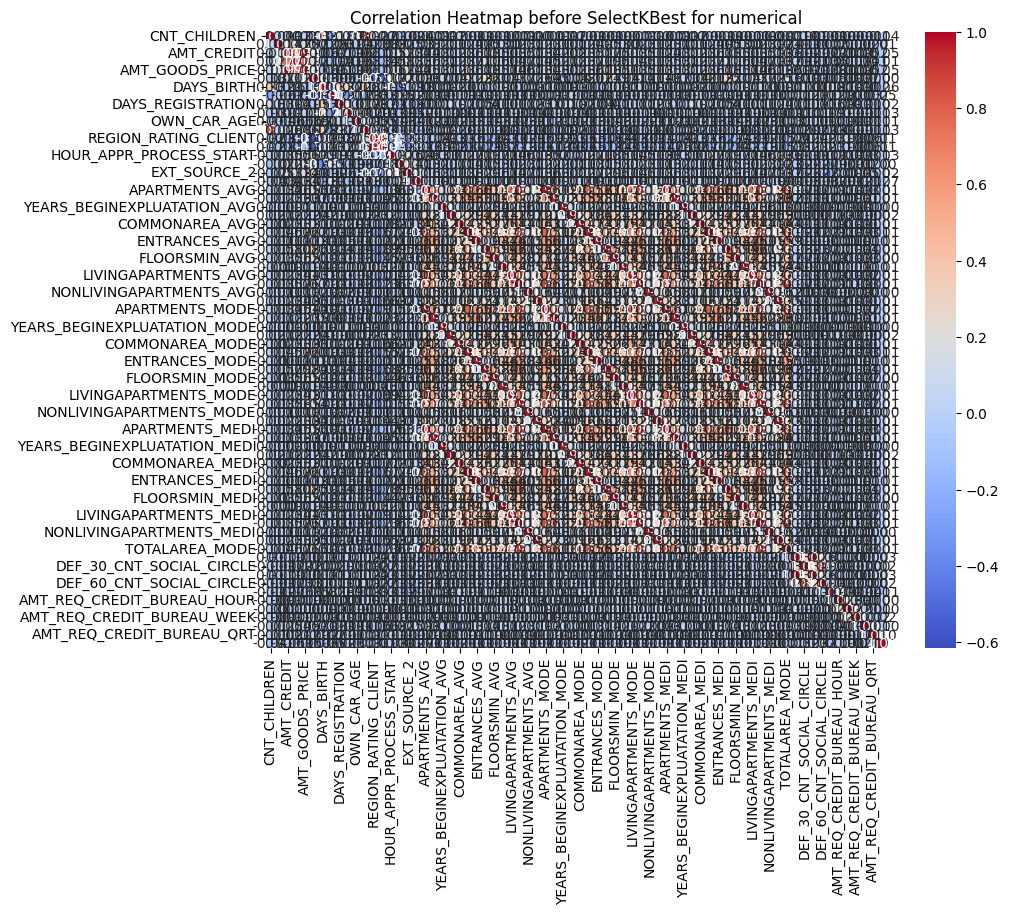

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_before = df_clean_numerical_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_before, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap before SelectKBest for numerical")
plt.show()


#### Checking features after being cleaned. Using ANOVA F test function in SelectKBest

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

selector_num = SelectKBest(score_func=f_classif, k=10)
X_num_selected = selector_num.fit_transform(df_clean_numerical_train, y_train)
selected_num_features = df_clean_numerical_train.columns[selector_num.get_support()]
print("Top 10 numerical features:\n")
for feature in selected_num_features.tolist():
    print(feature)

Top 10 numerical features:

DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
DAYS_LAST_PHONE_CHANGE


In [27]:
X_SelectKBest_Numerical = pd.DataFrame(X_num_selected, columns=selected_num_features, index=df_clean_numerical_train.index)


print("\nNew DataFrame with selected features:")
X_SelectKBest_Numerical.head()


New DataFrame with selected features:


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
181648,0.855291,-0.457375,-0.393927,-1.111106,-0.102783,-0.062600,-8.380250e-01,-1.177100,6.425555e-01,1.164356
229245,0.150020,-0.451322,1.049094,0.663110,1.862347,1.927067,-7.947445e-16,-0.000222,-6.366570e-16,0.548714
122525,-0.751224,-0.462337,-0.840225,0.100877,1.862347,-0.062600,-7.947445e-16,-0.143502,5.049518e-01,-0.618465
306311,-0.403745,-0.462372,1.122579,1.093404,-0.102783,-0.062600,-7.947445e-16,0.845392,-3.242860e-01,-1.274021
300658,1.729030,-0.457595,0.600526,1.420268,-0.102783,-0.062600,-7.947445e-16,-1.884246,-6.366570e-16,0.323745


#### Visualizing the heatmap after SelectKBest ANOVA F test

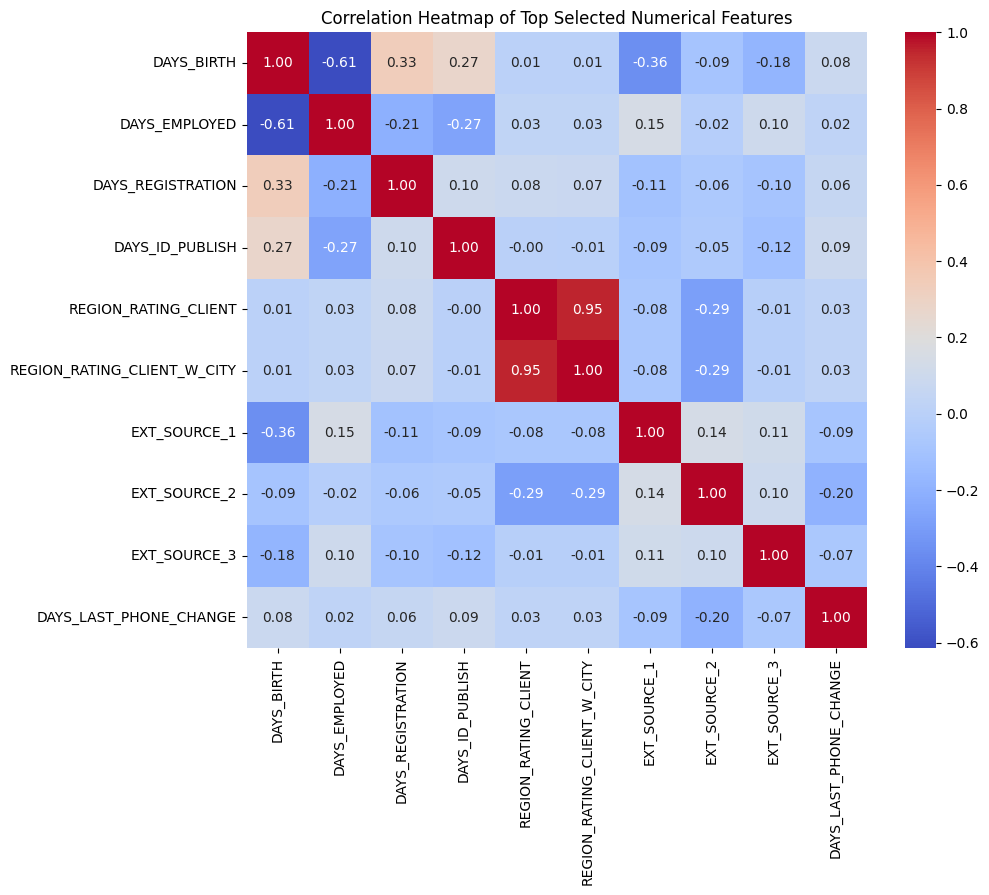

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_SelectKBest_Numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Top Selected Numerical Features")
plt.show()


#### removing one of the feature that shows 0.95 correlation

In [29]:
X_SelectKBest_Numerical = X_SelectKBest_Numerical.drop(columns=['REGION_RATING_CLIENT_W_CITY'])

#### see the heatmap again

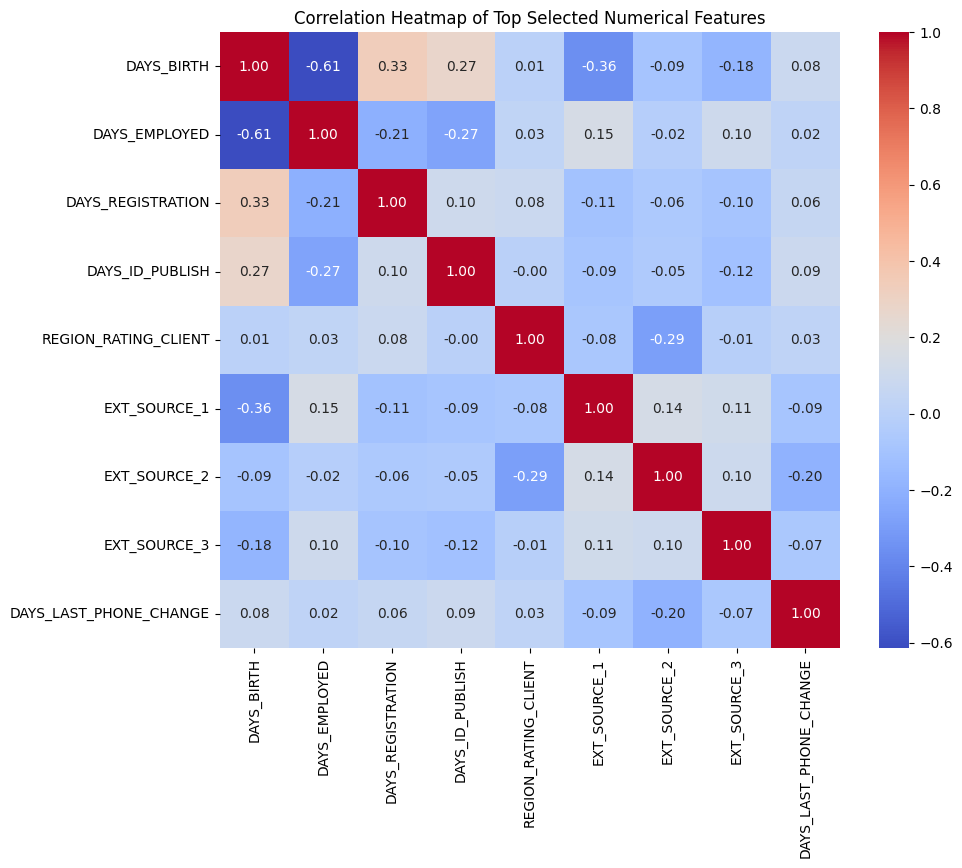

In [30]:
corr_matrix = X_SelectKBest_Numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Top Selected Numerical Features")
plt.show()

### Dropping Categorical features using SelectKBest chi function

#### checking categorical data

In [31]:
df_encoded_train.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
181648,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229245,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122525,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306311,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0

#### Using selectKBest chi function to filter categorical data after oneHotEncoding

In [32]:
from sklearn.feature_selection import SelectKBest, chi2

selector_cat = SelectKBest(score_func=chi2, k=10)
X_cat_selected = selector_cat.fit_transform(df_encoded_train, y_train)
selected_cat_features = df_encoded_train.columns[selector_cat.get_support()]

print("Top 10 categorical features:\n")
for feature in selected_cat_features.tolist():
    print(feature)

Top 10 categorical features:

NAME_CONTRACT_TYPE_Revolving loans
CODE_GENDER_M
NAME_INCOME_TYPE_Pensioner
NAME_INCOME_TYPE_Working
NAME_EDUCATION_TYPE_Higher education
NAME_EDUCATION_TYPE_Secondary / secondary special
NAME_FAMILY_STATUS_Single / not married
NAME_HOUSING_TYPE_With parents
ORGANIZATION_TYPE_Self-employed
ORGANIZATION_TYPE_XNA


#### dataframe categorical after selectKBest

In [33]:
X_SelectKBest_categorical = pd.DataFrame(X_cat_selected, columns=selected_cat_features, index=df_encoded_train.index)


print("\nNew DataFrame with selected features:")
X_SelectKBest_categorical.head()


New DataFrame with selected features:


,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Single / not married,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_XNA
181648,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
229245,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
122525,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
306311,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
300658,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### chi square score for categorical features

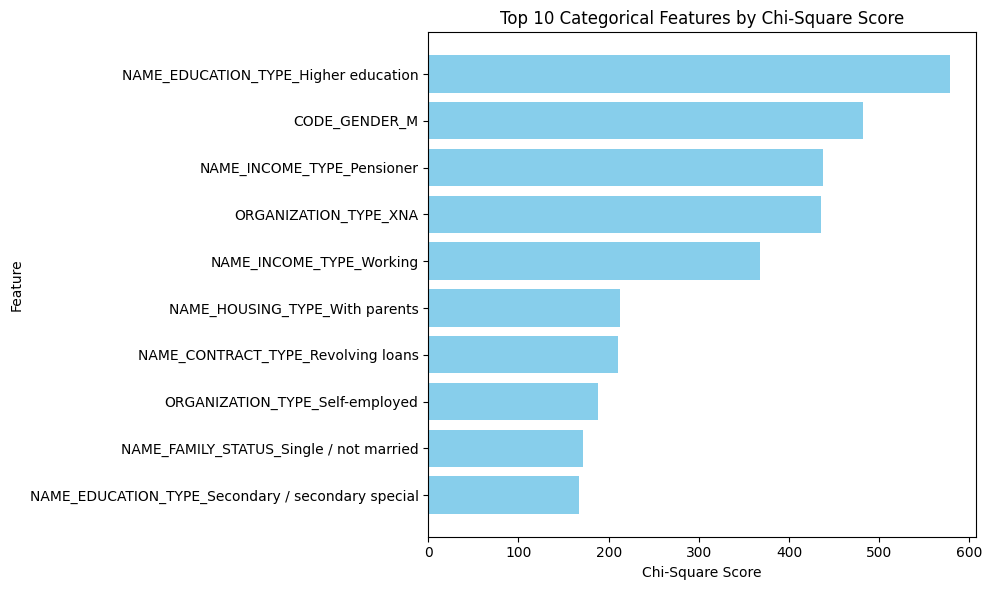

In [34]:
chi2_scores = pd.DataFrame({
    'Feature': df_encoded_train.columns,
    'Chi2_Score': selector_cat.scores_
}).sort_values(by='Chi2_Score', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(chi2_scores['Feature'][:10][::-1], chi2_scores['Chi2_Score'][:10][::-1], color='skyblue')
plt.xlabel('Chi-Square Score')
plt.ylabel('Feature')
plt.title('Top 10 Categorical Features by Chi-Square Score')
plt.tight_layout()
plt.show()

### Dropping Boolean features using SelectKBest chi function

#### checking boolean data

In [40]:
feature_boolean = dictionary["boolean"]
df_boolean_X_train = X_train[feature_boolean]
df_boolean_X_test = X_test[feature_boolean]

df_boolean_X_train.head()

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
181648,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
229245,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
122525,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306311,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
300658,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
df_boolean_X_test.head()

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
256571,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
191493,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103497,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
130646,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
211898,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### perform selectKBest chi on boolean datatype

In [36]:
selector_bool = SelectKBest(score_func=chi2, k=10)
X_bool_selected = selector_bool.fit_transform(df_boolean_X_train, y_train)
selected_bool_features = df_boolean_X_train.columns[selector_bool.get_support()]

print("Top 10 boolean features:\n")
for feature in selected_bool_features.tolist():
    print(feature)

Top 10 boolean features:

FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_PHONE
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
FLAG_DOCUMENT_3
FLAG_DOCUMENT_6
FLAG_DOCUMENT_13
FLAG_DOCUMENT_16


#### dataframe boolean after selectKbEST

In [37]:
X_SelectKBest_boolean = pd.DataFrame(X_bool_selected, columns=selected_bool_features, index=df_boolean_X_train.index)


print("\nNew DataFrame with selected features:")
X_SelectKBest_boolean.head()


New DataFrame with selected features:


,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16
181648,1,0,0,0,0,0,1,0,0,0
229245,1,0,0,0,1,1,1,0,0,0
122525,1,0,1,0,0,0,1,0,0,0
306311,1,0,1,0,0,0,1,0,0,0
300658,1,0,0,0,0,0,1,0,0,0


#### Chi square score for boolean

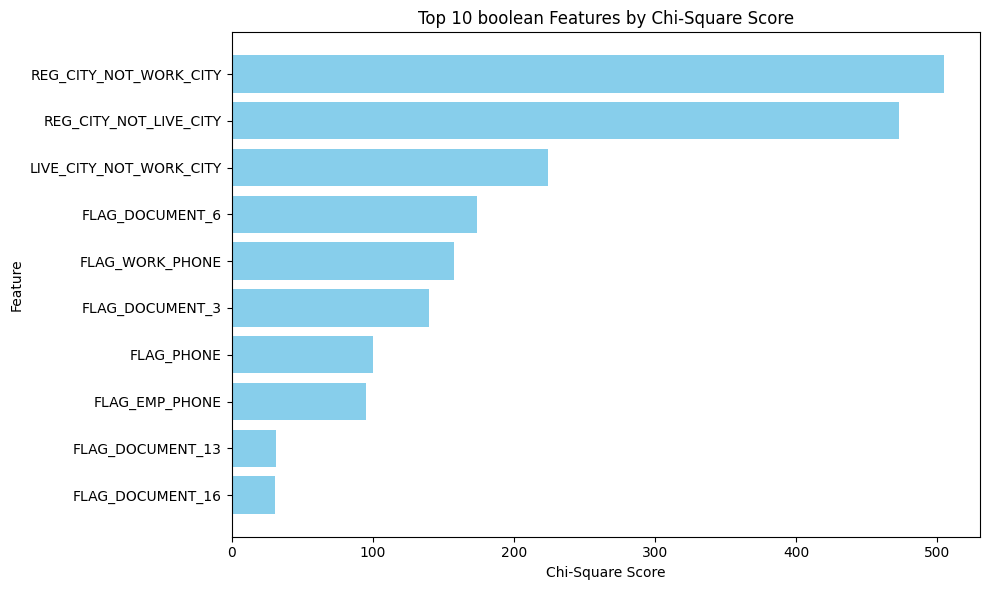

In [38]:
chi2_scores = pd.DataFrame({
    'Feature': df_boolean_X_train.columns,
    'Chi2_Score': selector_bool.scores_
}).sort_values(by='Chi2_Score', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(chi2_scores['Feature'][:10][::-1], chi2_scores['Chi2_Score'][:10][::-1], color='skyblue')
plt.xlabel('Chi-Square Score')
plt.ylabel('Feature')
plt.title('Top 10 boolean Features by Chi-Square Score')
plt.tight_layout()
plt.show()

## Forming new Dataframe after filter method

In [42]:
new_cleaned_df_train = pd.concat([X_SelectKBest_Numerical, X_SelectKBest_categorical, X_SelectKBest_boolean], axis=1)
new_cleaned_df_train.head()


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Single / not married,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_XNA,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16
181648,0.855291,-0.457375,-0.393927,-1.111106,-0.102783,-8.380250e-01,-1.177100,6.425555e-01,1.164356,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0
229245,0.150020,-0.451322,1.049094,0.663110,1.862347,-7.947445e-16,-0.000222,-6.366570e-16,0.548714,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,1,0,0,0
122525,-0.751224,-0.462337,-0.840225,0.100877,1.862347,-7.947445e-16,-0.143502,5.049518e-01,-0.618465,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0,1,0,0,0,1,0,0,0
306311,-0.403745,-0.462372,1.122579,1.093404,-0.102783,-7.947445e-16,0.845392,-3.242860e-01,-1.274021,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0,1,0,0,0,1,0,0,0
300658,1.729030,-0.457595,0.600526,1.420268,-0.102783,-7.947445e-16,-1.884246,-6.366570e-16,0.323745,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0


In [45]:
new_cleaned_df_test = pd.concat([df_clean_numerical_test[X_SelectKBest_Numerical.columns], df_encoded_test[X_SelectKBest_categorical.columns], df_boolean_X_test[X_SelectKBest_boolean.columns]], axis=1)
new_cleaned_df_test.head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Single / not married,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_XNA,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16
256571,0.578409,-0.451414,0.599675,-0.933419,-0.102783,-7.947445e-16,0.419148,-0.477189,0.646685,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0
191493,-0.388159,-0.485614,0.095214,1.150423,-0.102783,6.578868e-01,0.551634,-0.149209,-0.639027,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0
103497,-1.872736,-0.459112,-2.134007,0.344865,-0.102783,-7.947445e-16,-2.536131,0.160518,0.366078,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,1,0,0,0
130646,1.462232,-0.453186,1.140737,0.467522,1.862347,9.091628e-01,-0.506555,-0.567844,0.248755,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1,1,0,1,1,0,0,0,0,0
211898,-0.334066,-0.460352,-1.439450,1.295622,-0.102783,-7.947445e-16,-0.833746,0.475083,0.830531,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,1,0,0,0


In [46]:
print(f"df clean has \t: {len(new_cleaned_df_train)} rows")
print(f"df clean has \t: {len(new_cleaned_df_train.columns)} features")

df clean has 	: 246008 rows
df clean has 	: 29 features


In [47]:
print(f"df clean has \t: {len(new_cleaned_df_test)} rows")
print(f"df clean has \t: {len(new_cleaned_df_test.columns)} features")

df clean has 	: 61503 rows
df clean has 	: 29 features


## 10 best feature from RFE feature engineering for classification problem.

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pandas as pd

# --- Define your models ---
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# --- Container for results ---
rfe_results = {}

# --- Loop through models and perform RFE ---
for name, model in models.items():
    rfe = RFE(estimator=model, n_features_to_select=10)
    X_rfe_selected = rfe.fit_transform(new_cleaned_df_train, y_train)
    
    selected_features = new_cleaned_df_train.columns[rfe.support_]
    X_RFE = pd.DataFrame(X_rfe_selected, columns=selected_features, index=new_cleaned_df_train.index)
    
    rfe_results[name] = {
        "model": model,
        "selected_features": selected_features,
        "X_RFE": X_RFE
    }
    
    print(f"\n Top 10 Features Selected by {name}:")
    for f in selected_features.tolist():
        print(f)


print("\n Random Forest RFE Reduced DataFrame Preview:")
display(rfe_results["RandomForest"]["X_RFE"].head())




 Top 10 Features Selected by LogisticRegression:
DAYS_EMPLOYED
EXT_SOURCE_2
EXT_SOURCE_3
CODE_GENDER_M
NAME_INCOME_TYPE_Pensioner
NAME_EDUCATION_TYPE_Higher education
ORGANIZATION_TYPE_XNA
FLAG_EMP_PHONE
FLAG_DOCUMENT_13
FLAG_DOCUMENT_16

 Top 10 Features Selected by DecisionTree:
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
REGION_RATING_CLIENT
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
DAYS_LAST_PHONE_CHANGE
FLAG_PHONE

 Top 10 Features Selected by RandomForest:
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
REGION_RATING_CLIENT
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
DAYS_LAST_PHONE_CHANGE
FLAG_PHONE


d:\Kuliah\Semester 5\Machine Learning\Source-Code\IF441-B-MachineLearning-HomeCreditRisk-FinalProject\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:52:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Kuliah\Semester 5\Machine Learning\Source-Code\IF441-B-MachineLearning-HomeCreditRisk-FinalProject\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:52:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Kuliah\Semester 5\Machine Learning\Source-Code\IF441-B-MachineLearning-HomeCreditRisk-FinalProject\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:52:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterat


 Top 10 Features Selected by XGBoost:
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
NAME_CONTRACT_TYPE_Revolving loans
CODE_GENDER_M
NAME_INCOME_TYPE_Working
NAME_EDUCATION_TYPE_Higher education
ORGANIZATION_TYPE_Self-employed
REG_CITY_NOT_LIVE_CITY
FLAG_DOCUMENT_3
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2038
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014450 seconds.
You 

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_PHONE
181648,0.855291,-0.457375,-0.393927,-1.111106,-0.102783,-8.380250e-01,-1.177100,6.425555e-01,1.164356,0.0
229245,0.150020,-0.451322,1.049094,0.663110,1.862347,-7.947445e-16,-0.000222,-6.366570e-16,0.548714,0.0
122525,-0.751224,-0.462337,-0.840225,0.100877,1.862347,-7.947445e-16,-0.143502,5.049518e-01,-0.618465,1.0
306311,-0.403745,-0.462372,1.122579,1.093404,-0.102783,-7.947445e-16,0.845392,-3.242860e-01,-1.274021,1.0
300658,1.729030,-0.457595,0.600526,1.420268,-0.102783,-7.947445e-16,-1.884246,-6.366570e-16,0.323745,0.0


## evaluating SMOTE ADASYN and COST SENSITIVE for each model

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np
import pandas as pd



selected_features_dict = {
    "LogisticRegression": ['DAYS_EMPLOYED', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'CODE_GENDER_M',
                           'NAME_INCOME_TYPE_Pensioner', 'NAME_EDUCATION_TYPE_Higher education',
                           'ORGANIZATION_TYPE_XNA', 'FLAG_EMP_PHONE', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_16'],
    "DecisionTree": ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
                     'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                     'DAYS_LAST_PHONE_CHANGE', 'FLAG_PHONE'],
    "RandomForest": ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
                     'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                     'DAYS_LAST_PHONE_CHANGE', 'FLAG_PHONE'],
    "XGBoost": ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'NAME_CONTRACT_TYPE_Revolving loans',
                'CODE_GENDER_M', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
                'ORGANIZATION_TYPE_Self-employed', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3'],
    "LightGBM": ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
                 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE',
                 'CODE_GENDER_M', 'NAME_EDUCATION_TYPE_Higher education']
}

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Imbalance handling methods
imbalance_methods = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "CostSensitive": None  # handled internally via class_weight
}

# Metrics container
results = []

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# -------------------------------
# Run Experiments
# -------------------------------
for model_name, model in models.items():
    print(f"\n===== Model: {model_name} =====")
    X_model = new_cleaned_df_train[selected_features_dict[model_name]]

    for imbalance_name, imbalance_method in imbalance_methods.items():
        print(f"\n--- Imbalance Handling: {imbalance_name} ---")

        acc_scores, prec_scores, rec_scores, f1_scores, roc_scores, mcc_scores = [], [], [], [], [], []

        for fold, (train_idx, test_idx) in enumerate(skf.split(X_model, y)):
            X_train, X_test = X_model.iloc[train_idx], X_model.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Handle imbalance
            if imbalance_name in ["SMOTE", "ADASYN"]:
                X_res, y_res = imbalance_method.fit_resample(X_train, y_train)
                model.fit(X_res, y_res)
            elif imbalance_name == "CostSensitive":
                # Compute class weights
                classes = np.unique(y_train)
                weights = compute_class_weight('balanced', classes=classes, y=y_train)
                class_weight_dict = dict(zip(classes, weights))

                # Recreate model with class weights (if supported)
                if model_name == "LogisticRegression":
                    model = LogisticRegression(max_iter=1000, solver='liblinear', class_weight=class_weight_dict)
                elif model_name == "DecisionTree":
                    model = DecisionTreeClassifier(random_state=42, class_weight=class_weight_dict)
                elif model_name == "RandomForest":
                    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight_dict)
                elif model_name == "XGBoost":
                    # XGBoost uses scale_pos_weight instead of class_weight
                    ratio = np.sum(y_train == 0) / np.sum(y_train == 1)
                    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                                          random_state=42, scale_pos_weight=ratio)
                elif model_name == "LightGBM":
                    model = LGBMClassifier(random_state=42, class_weight=class_weight_dict)
                model.fit(X_train, y_train)

            # Prediction
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

            # Metrics
            acc_scores.append(accuracy_score(y_test, y_pred))
            prec_scores.append(precision_score(y_test, y_pred))
            rec_scores.append(recall_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))
            roc_scores.append(roc_auc_score(y_test, y_prob))
            mcc_scores.append(matthews_corrcoef(y_test, y_pred))

        # Average metrics across 5 folds
        print(f"Accuracy: {np.mean(acc_scores):.4f}")
        print(f"Precision: {np.mean(prec_scores):.4f}")
        print(f"Recall: {np.mean(rec_scores):.4f}")
        print(f"F1-score: {np.mean(f1_scores):.4f}")
        print(f"ROC-AUC: {np.mean(roc_scores):.4f}")
        print(f"MCC: {np.mean(mcc_scores):.4f}")

        results.append({
            "Model": model_name,
            "Imbalance_Method": imbalance_name,
            "Accuracy": np.mean(acc_scores),
            "Precision": np.mean(prec_scores),
            "Recall": np.mean(rec_scores),
            "F1-score": np.mean(f1_scores),
            "ROC-AUC": np.mean(roc_scores),
            "MCC": np.mean(mcc_scores)
        })

# Convert to DataFrame for summary
results_df = pd.DataFrame(results)
print("\n=== Summary of All Models ===")
display(results_df)



===== Model: LogisticRegression =====

--- Imbalance Handling: SMOTE ---
Accuracy: 0.6764
Precision: 0.1515
Recall: 0.6536
F1-score: 0.2459
ROC-AUC: 0.7260
MCC: 0.1898

--- Imbalance Handling: ADASYN ---
Accuracy: 0.6621
Precision: 0.1482
Recall: 0.6712
F1-score: 0.2428
ROC-AUC: 0.7260
MCC: 0.1881

--- Imbalance Handling: CostSensitive ---
Accuracy: 0.6764
Precision: 0.1513
Recall: 0.6525
F1-score: 0.2456
ROC-AUC: 0.7257
MCC: 0.1893

===== Model: DecisionTree =====

--- Imbalance Handling: SMOTE ---
Accuracy: 0.7584
Precision: 0.1219
Recall: 0.3213
F1-score: 0.1768
ROC-AUC: 0.5591
MCC: 0.0786

--- Imbalance Handling: ADASYN ---
Accuracy: 0.7571
Precision: 0.1212
Recall: 0.3213
F1-score: 0.1760
ROC-AUC: 0.5583
MCC: 0.0775

--- Imbalance Handling: CostSensitive ---
Accuracy: 0.8610
Precision: 0.1411
Recall: 0.1419
F1-score: 0.1415
ROC-AUC: 0.5330
MCC: 0.0659

===== Model: RandomForest =====

--- Imbalance Handling: SMOTE ---
Accuracy: 0.8413
Precision: 0.1827
Recall: 0.2781
F1-score: 0.

d:\Kuliah\Semester 5\Machine Learning\Source-Code\IF441-B-MachineLearning-HomeCreditRisk-FinalProject\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:20:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Kuliah\Semester 5\Machine Learning\Source-Code\IF441-B-MachineLearning-HomeCreditRisk-FinalProject\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:20:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Kuliah\Semester 5\Machine Learning\Source-Code\IF441-B-MachineLearning-HomeCreditRisk-FinalProject\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:20:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterat

Accuracy: 0.6971
Precision: 0.1522
Recall: 0.6023
F1-score: 0.2430
ROC-AUC: 0.7097
MCC: 0.1798

--- Imbalance Handling: ADASYN ---


d:\Kuliah\Semester 5\Machine Learning\Source-Code\IF441-B-MachineLearning-HomeCreditRisk-FinalProject\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:20:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Kuliah\Semester 5\Machine Learning\Source-Code\IF441-B-MachineLearning-HomeCreditRisk-FinalProject\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:21:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Kuliah\Semester 5\Machine Learning\Source-Code\IF441-B-MachineLearning-HomeCreditRisk-FinalProject\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:21:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterat

Accuracy: 0.6787
Precision: 0.1474
Recall: 0.6227
F1-score: 0.2384
ROC-AUC: 0.7074
MCC: 0.1760

--- Imbalance Handling: CostSensitive ---


d:\Kuliah\Semester 5\Machine Learning\Source-Code\IF441-B-MachineLearning-HomeCreditRisk-FinalProject\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:21:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Kuliah\Semester 5\Machine Learning\Source-Code\IF441-B-MachineLearning-HomeCreditRisk-FinalProject\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:21:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Kuliah\Semester 5\Machine Learning\Source-Code\IF441-B-MachineLearning-HomeCreditRisk-FinalProject\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:21:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterat

Accuracy: 0.6882
Precision: 0.1530
Recall: 0.6307
F1-score: 0.2462
ROC-AUC: 0.7204
MCC: 0.1873

===== Model: LightGBM =====

--- Imbalance Handling: SMOTE ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 180918, number of negative: 180918
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2513
[LightGBM] [Info] Number of data points in the train set: 361836, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 180918, number of negative: 180918
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And 

,Model,Imbalance_Method,Accuracy,Precision,Recall,F1-score,ROC-AUC,MCC
0,LogisticRegression,SMOTE,0.676413,0.151454,0.653625,0.245924,0.726032,0.189843
1,LogisticRegression,ADASYN,0.662056,0.148220,0.671249,0.242821,0.725979,0.188078
2,LogisticRegression,CostSensitive,0.676450,0.151284,0.652467,0.245617,0.725728,0.189291
3,DecisionTree,SMOTE,0.758414,0.121947,0.321349,0.176794,0.559073,0.078648
4,DecisionTree,ADASYN,0.757110,0.121174,0.321299,0.175975,0.558340,0.077490
5,DecisionTree,CostSensitive,0.861009,0.141091,0.141893,0.141487,0.533027,0.065875
6,RandomForest,SMOTE,0.841269,0.182712,0.278147,0.220544,0.679406,0.140123
7,RandomForest,ADASYN,0.835806,0.176628,0.282326,0.217297,0.676371,0.135493
8,RandomForest,CostSensitive,0.919181,0.466611,0.006697,0.013201,0.701472,0.048092
9,XGBoost,SMOTE,0.697071,0.152201,0.602266,0.242992,0.709671,0.179754


### Decision Tree

## Using Logistic regression to check model accuracy

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, matthews_corrcoef, confusion_matrix,
)

X_train, X_test, y_train, y_test = train_test_split(new_cleaned_df, y, test_size=0.2, random_state=42, stratify=y)

log_reg = LogisticRegression(max_iter=1000, solver="liblinear")

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("MCC:", matthews_corrcoef(y_test, y_pred))


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9191699524409577
Precision: 0.45901639344262296
Recall: 0.007049345417925478
F1-score: 0.01388544507810563
ROC-AUC: 0.7344658686418459
MCC: 0.0489249390482594

Confusion Matrix:
[[45197    33]
 [ 3944    28]]


## Using Random Forest algorithm to test model accuracy

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("MCC:", matthews_corrcoef(y_test, y_pred))


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9195764399821146
Precision: 0.6363636363636364
Recall: 0.008811681772406849
F1-score: 0.017382666997765087
ROC-AUC: 0.7344658686418459
MCC: 0.06823189614069623

Confusion Matrix:
[[45210    20]
 [ 3937    35]]


## Using Decision Tree algorithm to test model accuracy

In [40]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("MCC:", matthews_corrcoef(y_test, y_pred))


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8514084793301085
Precision: 0.1365120836054866
Recall: 0.1578549848942598
F1-score: 0.14640980735551665
ROC-AUC: 0.7344658686418459
MCC: 0.06570657211009537

Confusion Matrix:
[[41264  3966]
 [ 3345   627]]


# Using SMOTE to handle imbalance class on dependent variable

## Logistic regression on SMOTE

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)
log_reg_SMOTE = LogisticRegression()

log_reg_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

y_pred = log_reg_SMOTE.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("MCC:", matthews_corrcoef(y_test, y_pred))


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

d:\Kuliah\Semester 5\Machine Learning\Source-Code\IF441-B-MachineLearning-HomeCreditRisk-FinalProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6828990691435307
Precision: 0.15028866971373586
Recall: 0.629154078549849
F1-score: 0.24262135922330097
ROC-AUC: 0.7344658686418459
MCC: 0.18243594127255475

Confusion Matrix:
[[31101 14129]
 [ 1473  2499]]


## Random forest on SMOTE

In [42]:
random_forest_SMOTE = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = random_forest_SMOTE.predict(X_test)

y_prob = log_reg.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("MCC:", matthews_corrcoef(y_test, y_pred))


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8816308280151214
Precision: 0.20733249051833122
Recall: 0.16515609264853978
F1-score: 0.18385650224215247
ROC-AUC: 0.7344658686418459
MCC: 0.12183512288724478

Confusion Matrix:
[[42722  2508]
 [ 3316   656]]


## Decision Tree on SMOTE

In [43]:
decision_tree_SMOTE = DecisionTreeClassifier(random_state=42)

decision_tree_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = decision_tree_SMOTE.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("MCC:", matthews_corrcoef(y_test, y_pred))


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7794601845453437
Precision: 0.11693952555963916
Recall: 0.26435045317220546
F1-score: 0.16214964095436646
ROC-AUC: 0.7344658686418459
MCC: 0.06280342309465224

Confusion Matrix:
[[37301  7929]
 [ 2922  1050]]


## Performing SHAP model validation from best Model after SMOTE (Random forest)

In [44]:
best_model =  RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train_SMOTE, y_train_SMOTE)



RandomForestClassifier(random_state=42)